In [1]:
import pandas as pd

# Load datasets
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
credit_df = pd.read_csv('../data/creditcard.csv')
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')

# Display shapes
print("Fraud_Data shape:", fraud_df.shape)
print("Creditcard shape:", credit_df.shape)
print("IP Address shape:", ip_df.shape)

# Show first few rows
fraud_df.head()


Fraud_Data shape: (151112, 11)
Creditcard shape: (284807, 31)
IP Address shape: (138846, 3)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Step 1: Import Libraries and Load Data

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings
pd.set_option('display.max_columns', None)


In [3]:
# Load Data
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
credit_df = pd.read_csv('../data/creditcard.csv')
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')


Step 2: Quick Overview

In [4]:
print("Fraud_Data shape:", fraud_df.shape)
print("Creditcard shape:", credit_df.shape)
print("IP Mapping shape:", ip_df.shape)

fraud_df.head()


Fraud_Data shape: (151112, 11)
Creditcard shape: (284807, 31)
IP Mapping shape: (138846, 3)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Check column info and missing values:

In [5]:
fraud_df.info()
fraud_df.isnull().sum()

credit_df.info()
credit_df.isnull().sum()

ip_df.info()
ip_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1 

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

1. Fraud_Data.csv (E-commerce data)

151112 entries, all columns have 151112 non-null
✅ No missing values
⚠️ `ip_address` is float64 — needs correction

2. creditcard.csv (Bank transaction data)

284807 entries, all columns non-null
✅ No missing values

3. IpAddress_to_Country.csv

138846 entries
✔️ `lower_bound_ip_address`, `upper_bound_ip_address`, and `country` all have 138846 non-null
✅ No missing values



In [6]:
#Convert Data Types

# Convert datetime strings to datetime objects
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Convert float IPs to integers
fraud_df['ip_address'] = fraud_df['ip_address'].astype(int)


In [8]:
ip_df.dtypes 

fraud_df.dtypes

credit_df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
#Check for Duplicates

# Duplicates check
print("Fraud Data duplicates:", fraud_df.duplicated().sum())
print("Credit Data duplicates:", credit_df.duplicated().sum())
print("IP Mapping duplicates:", ip_df.duplicated().sum())

# Remove if any
fraud_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)
ip_df.drop_duplicates(inplace=True)


Fraud Data duplicates: 0
Credit Data duplicates: 1081
IP Mapping duplicates: 0


In [12]:
#final Check for Duplicates

# Duplicates check
print("Fraud Data duplicates:", fraud_df.duplicated().sum())
print("Credit Data duplicates:", credit_df.duplicated().sum())
print("IP Mapping duplicates:", ip_df.duplicated().sum())



Fraud Data duplicates: 0
Credit Data duplicates: 0
IP Mapping duplicates: 0


In [10]:
#Check for Invalid or Outlier Values 

fraud_df['age'].describe()


count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64

✅ No obvious outliers (e.g., no age < 10 or > 100), so we don't need to filter or correct this column.

Step 5: Exploratory Data Analysis (EDA)
We’ll perform:

🔹 A. Univariate Analysis
🔹 B. Bivariate Analysis
🔹 C. Class Imbalance Visualization

A. Univariate Analysis

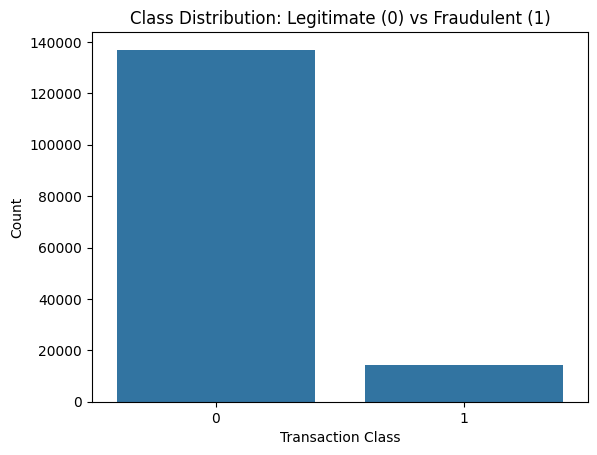

In [13]:
#Class Distribution

sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution: Legitimate (0) vs Fraudulent (1)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()


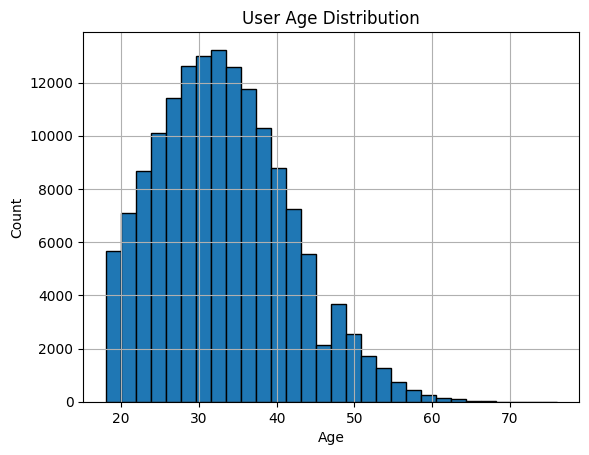

In [14]:
#Age distribution

fraud_df['age'].hist(bins=30, edgecolor='black')
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


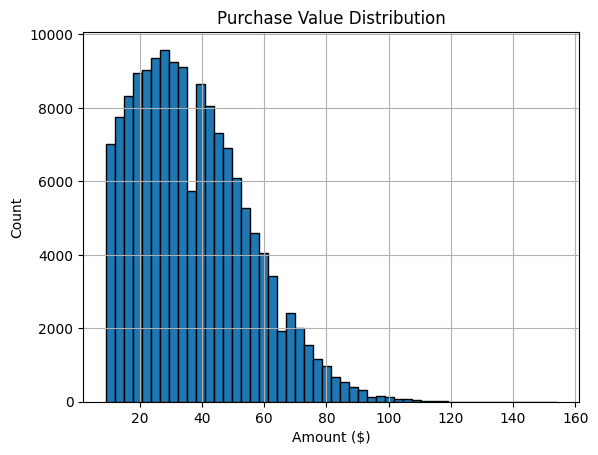

In [15]:
#purchase value distribution

fraud_df['purchase_value'].hist(bins=50, edgecolor='black')
plt.title("Purchase Value Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Count")
plt.show()


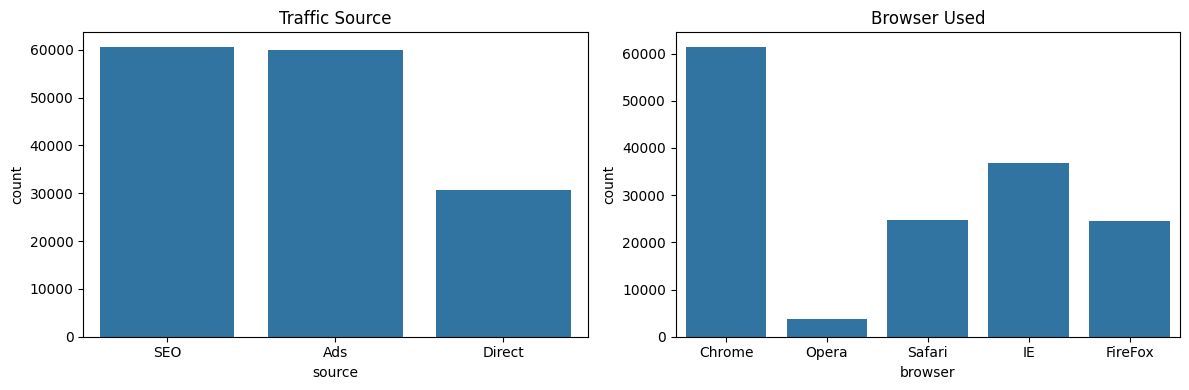

In [16]:
#source and browers distribution

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='source', data=fraud_df)
plt.title("Traffic Source")

plt.subplot(1, 2, 2)
sns.countplot(x='browser', data=fraud_df)
plt.title("Browser Used")

plt.tight_layout()
plt.show()


B. Bivariate Analysis

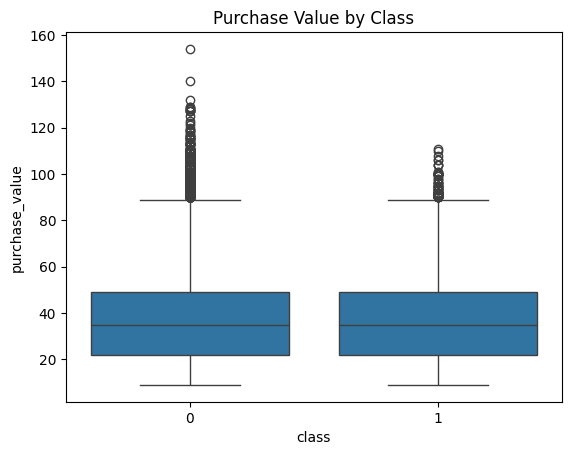

In [17]:
#purchase value by class

sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value by Class")
plt.show()


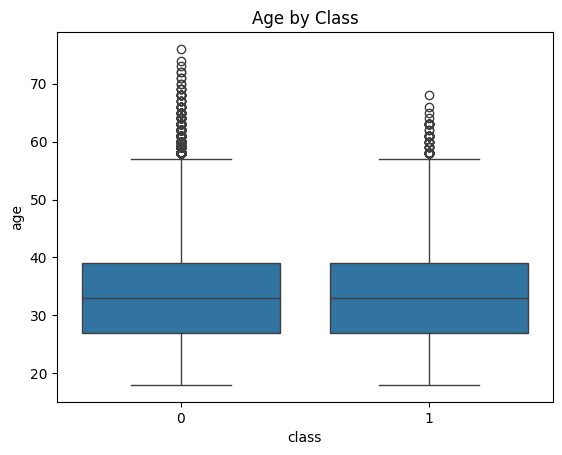

In [18]:
#Age by class

sns.boxplot(x='class', y='age', data=fraud_df)
plt.title("Age by Class")
plt.show()


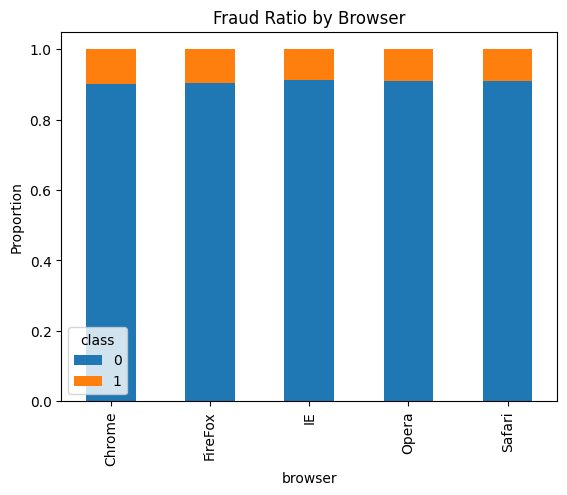

In [19]:
#browser vs fraud

pd.crosstab(fraud_df['browser'], fraud_df['class'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Fraud Ratio by Browser")
plt.ylabel("Proportion")
plt.show()


class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


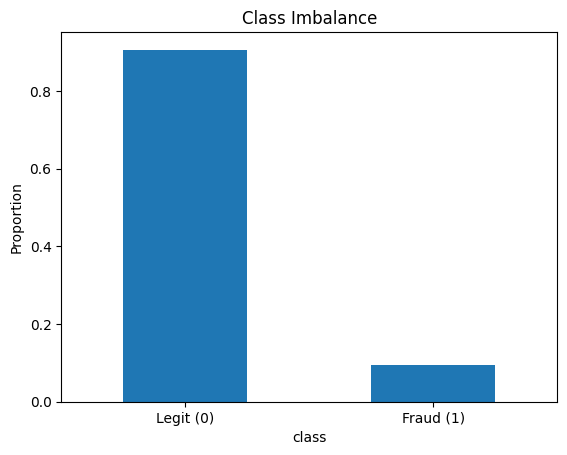

In [20]:
#Class Imbalance Ratio

fraud_ratio = fraud_df['class'].value_counts(normalize=True)
print(fraud_ratio)

fraud_ratio.plot(kind='bar')
plt.title("Class Imbalance")
plt.xticks(ticks=[0, 1], labels=["Legit (0)", "Fraud (1)"], rotation=0)
plt.ylabel("Proportion")
plt.show()


## Step 6: Feature Engineering

### A. Time-Based Features

From signup_time and purchase_time columns.

In [22]:
#hour of the day 

fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour


In [23]:
#Day of Week (0 = Monday, 6 = Sunday)

fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek


In [24]:
#Time Since Signup (in hours)

fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600


### B. Transaction Frequency (per user)
This shows how active each user is.

In [25]:
# Count how many times each user appears
user_freq = fraud_df.groupby('user_id').size().reset_index(name='transaction_count')

# Merge back to main dataframe
fraud_df = fraud_df.merge(user_freq, on='user_id', how='left')


### C. Country from IP Address
To extract country info, we’ll map the IP address (as integer) into the IP range from ip_df.
Step-by-step plan:

1. Ensure ip_address is integer (already done).

2. ip_df already has lower_bound_ip_address, upper_bound_ip_address, and country.

3. We'll define a custom function to map IPs to countries.

In [26]:
#Preview ip_df to ensure sorted ranges:

ip_df.sort_values('lower_bound_ip_address', inplace=True)


In [27]:
#Define a lookup function:

# Optimized lookup using searchsorted
def find_country(ip):
    idx = ip_df[
        (ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)
    ]
    if not idx.empty:
        return idx.iloc[0]['country']
    return 'Unknown'


In [28]:
#Apply it to fraud_df

fraud_df['country'] = fraud_df['ip_address'].apply(find_country)


In [29]:
#check how well the mapping worked:

fraud_df['country'].value_counts(dropna=False).head(10)


country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: count, dtype: int64

In [30]:
#check for how many returns unknown 

fraud_df['country'].isin(['Unknown']).mean()


np.float64(0.1453623802212928)

## Step 7: Data Transformation
### We’ll cover these substeps for fraud_df:

1. Train-test split

2. One-hot encode categorical variables

3. Normalize numeric features

4. Handle class imbalance (e.g., SMOTE)



In [31]:
#Train-Test Split
#First, separate features (X) and target (y):

from sklearn.model_selection import train_test_split

# Define features and target
X = fraud_df.drop(columns=['class', 'signup_time', 'purchase_time'])  # drop timestamps and target
y = fraud_df['class']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)



Training set: (120889, 13)
Test set: (30223, 13)


### Encode Categorical Features
Categorical columns to encode:

browser

source

sex

country

In [35]:
categorical_cols = ['browser', 'source', 'sex', 'country']
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align test with train in case some categories are missing in test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


KeyError: "None of [Index(['browser', 'source', 'sex', 'country'], dtype='object')] are in the [columns]"

In [36]:
# Define features to keep
features_to_use = [
    'purchase_value', 'age', 'time_since_signup', 'transaction_count',
    'browser', 'source', 'sex', 'country'
]


In [37]:
# Train-Test Split using only those

X = fraud_df[features_to_use]
y = fraud_df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [38]:
#hot encoding

categorical_cols = ['browser', 'source', 'sex', 'country']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align test with train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [39]:

# Final set of features
features_to_use = [
    'purchase_value', 'age', 'time_since_signup', 'transaction_count',
    'browser', 'source', 'sex', 'country'
]

X = fraud_df[features_to_use]
y = fraud_df['class']


In [40]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [41]:
#One-Hot Encode Categorical Features

categorical_cols = ['browser', 'source', 'sex', 'country']

# One-hot encode
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [42]:
#Normalize numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['purchase_value', 'age', 'time_since_signup', 'transaction_count']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [45]:
#handle class imbalance with SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Check balance
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


ImportError: cannot import name 'line_search_wolfe1' from 'sklearn.utils.fixes' (c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\fixes.py)

In [46]:
import sklearn
print(sklearn.__version__)


1.7.0


In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


ImportError: cannot import name 'line_search_wolfe1' from 'sklearn.utils.fixes' (c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\fixes.py)